In [89]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

mat = scipy.io.loadmat('ec014_639_samp.mat')

lfp = mat.get('lfp')
pos = mat.get('pos')
Tlist = mat.get('Tlist')
# Tlist[0][2].flatten() # spike times for neuron 3

plt.plot(lfp[0:256*10,0])

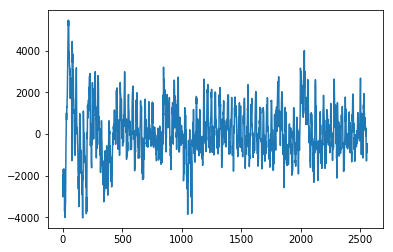

In [90]:
plt.show()

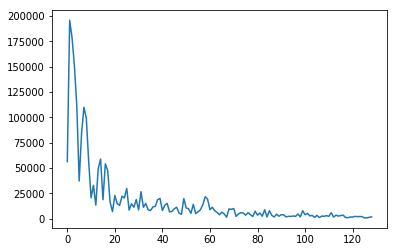

In [91]:
yfft = np.abs(np.fft.rfft(lfp[:,0], 256, axis=0))
plt.plot(yfft)
plt.show()

C:\Users\SSacco\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


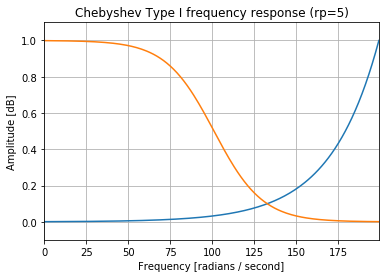

In [92]:
from scipy import signal
b, a = signal.cheby1(1, 10, .1, analog=True)
w, h = signal.freqs(b, a)
plt.title('Chebyshev Type I frequency response (rp=5)')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.plot(w)
plt.plot(h)
plt.show()

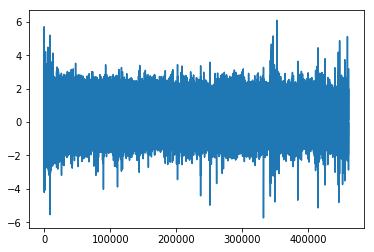

In [95]:
yfft_fil = signal.filtfilt(b,a,lfp[:,0])
plt.plot(yfft_fil)
plt.show()

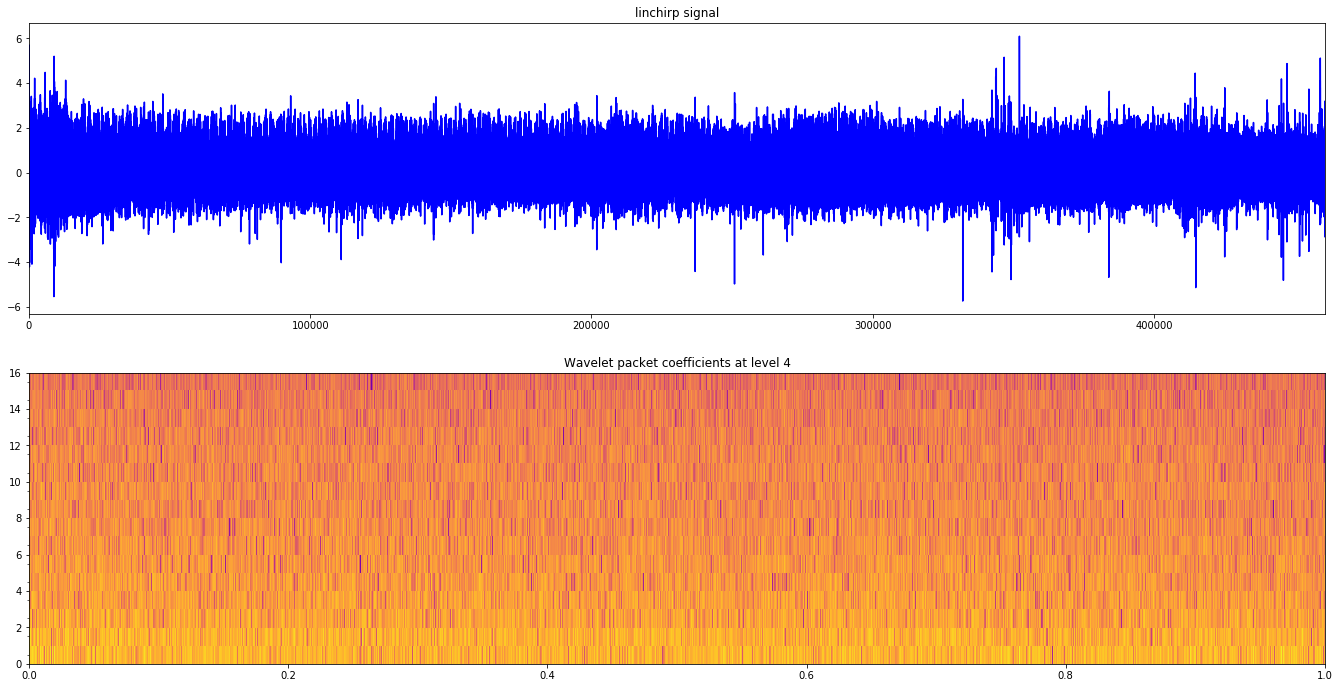

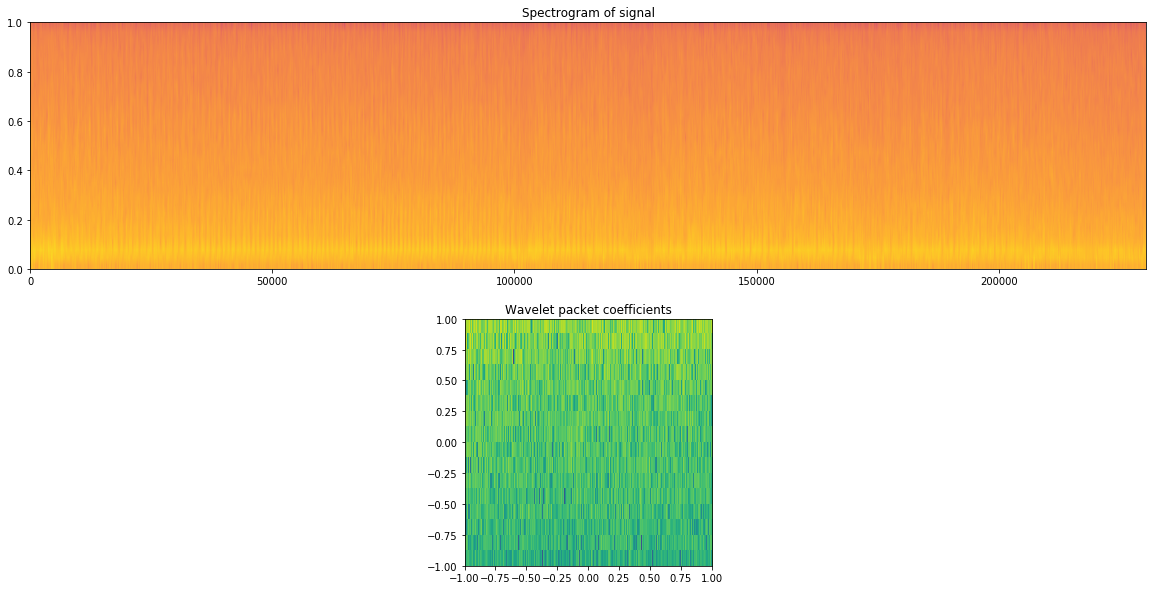

In [96]:
import pywt


x = np.linspace(0, 460800, num=460800)
data = yfft_fil

wavelet = 'db2'
level = 4
order = "freq"  # other option is "normal"
interpolation = 'nearest'
cmap = plt.cm.plasma

# Construct wavelet packet
wp = pywt.WaveletPacket(data, wavelet, 'symmetric', maxlevel=level)
nodes = wp.get_level(level, order=order)
labels = [n.path for n in nodes]
values = np.array([n.data for n in nodes], 'd')
values = abs(values)

# Show signal and wavelet packet coefficients
fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.2, bottom=.03, left=.07, right=.97, top=.92)
ax = fig.add_subplot(2, 1, 1)
ax.set_title("linchirp signal")
ax.plot(x, data, 'b')
ax.set_xlim(0, x[-1])

ax = fig.add_subplot(2, 1, 2)
ax.set_title("Wavelet packet coefficients at level %d" % level)
ax.imshow(np.log(values), interpolation=interpolation, cmap=cmap, aspect="auto",
          origin="lower", extent=[0, 1, 0, len(values)])
ax.set_yticks(np.arange(0.5, len(labels) + 0.5), labels)

# Show spectrogram and wavelet packet coefficients
fig2 = plt.figure(figsize=(20,10))
ax2 = fig2.add_subplot(211)
ax2.specgram(data, NFFT=64, noverlap=32, Fs=2, cmap=cmap,
             interpolation='bilinear')
ax2.set_title("Spectrogram of signal")
ax3 = fig2.add_subplot(212)
ax3.imshow(np.log(values), origin='upper', extent=[-1, 1, -1, 1],
           interpolation='nearest')
ax3.set_title("Wavelet packet coefficients")
plt.show()

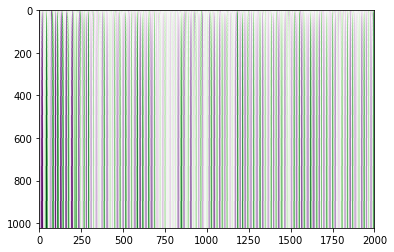

In [145]:
from scipy import signal
>>> import matplotlib.pyplot as plt
>>> sig  = yfft_fil [1:2000]
widths = np.arange(1,1024,1)
>>> cwtmatr = signal.cwt(sig, signal.ricker, np.log(widths+1))
>>> plt.imshow(cwtmatr, cmap='PRGn', aspect='auto', vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
>>> plt.show()